## Parte 2 do Trabalho de Conclusão de Curso - Especialização em Ciência de Dados

### Análise Exploratória, Tratamento/Processamento de Dados e criação de modelos de Machine Learning.

In [335]:
# Imports dos módulos

# Módulos gerais
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats
from dython.nominal import associations

# Módulos para construção dos modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [164]:
# Leitura do arquivo csv
reclamacao = pd.read_csv("dados\basecompleta2022-03.csv", sep = ';')

In [165]:
# Visualizando as primeiras 5 linhas
reclamacao.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa
0,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Morro Reuter,M,entre 41 a 50 anos,2022,1,13/01/2022,...,"Veículos Novos (motos, carros, caminhões)",Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Loja física,S,N,Finalizada não avaliada,Não Avaliada,NaN,Improcedente
1,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,M,entre 41 a 50 anos,2022,1,13/01/2022,...,Aéreo,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,Improcedente
2,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,F,entre 31 a 40 anos,2022,1,13/01/2022,...,Aéreo,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,Improcedente
3,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Santos,F,entre 31 a 40 anos,2022,1,14/01/2022,...,"Serviços na internet (provedor, hospedagem, ap...",Dados Pessoais e Privacidade,Vazamento de dados ou outros incidentes de seg...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,Improcedente
4,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Peruíbe,F,entre 21 a 30 anos,2022,1,14/01/2022,...,TV por Assinatura,Vício de Qualidade,Dificuldade para alterar/ ativar serviços,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,Improcedente


In [166]:
# Visualizando o shape dos dados
reclamacao.shape

(143572, 30)

In [167]:
# Avaliando os tipos de dados
reclamacao.dtypes

Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Data Resposta              object
Data Análise               object
Data Recusa                object
Data Finalização           object
Prazo Resposta             object
Prazo Analise Gestor      float64
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empresa           object
Respondida                 object
Situação                   object
Avaliação Reclamação       object
Nota do Consumidor        float64
Análise da Rec

In [168]:
# Convertendo as colunas de data para o tipo correto
reclamacao['Data Abertura'] = pd.to_datetime(reclamacao['Data Abertura'], format="%d/%m/%Y")
reclamacao['Data Resposta'] = pd.to_datetime(reclamacao['Data Resposta'], format="%d/%m/%Y")
reclamacao['Data Análise'] = pd.to_datetime(reclamacao['Data Análise'], format="%d/%m/%Y")
reclamacao['Data Recusa'] = pd.to_datetime(reclamacao['Data Recusa'], format="%d/%m/%Y")
reclamacao['Data Finalização'] = pd.to_datetime(reclamacao['Data Finalização'], format="%Y/%m/%d")
reclamacao['Prazo Resposta'] = pd.to_datetime(reclamacao['Prazo Resposta'], format="%d/%m/%Y")

In [169]:
reclamacao.dtypes

Gestor                            object
Canal de Origem                   object
Região                            object
UF                                object
Cidade                            object
Sexo                              object
Faixa Etária                      object
Ano Abertura                       int64
Mês Abertura                       int64
Data Abertura             datetime64[ns]
Data Resposta             datetime64[ns]
Data Análise              datetime64[ns]
Data Recusa               datetime64[ns]
Data Finalização          datetime64[ns]
Prazo Resposta            datetime64[ns]
Prazo Analise Gestor             float64
Tempo Resposta                   float64
Nome Fantasia                     object
Segmento de Mercado               object
Área                              object
Assunto                           object
Grupo Problema                    object
Problema                          object
Como Comprou Contratou            object
Procurou Empresa

In [170]:
reclamacao.info()
# Aqui vemos que a variável Sexo possui poucos valores nulos.
# Em contrapartida, as colunas Data Análise, Data Recusa, Nota do Consumidor, Análise da Recusa, Avaliação Reclamação e
# Prazo Análise Gestor possuem quantidades relevantes de valores missing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143572 entries, 0 to 143571
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Gestor                  143572 non-null  object        
 1   Canal de Origem         143572 non-null  object        
 2   Região                  143572 non-null  object        
 3   UF                      143572 non-null  object        
 4   Cidade                  143572 non-null  object        
 5   Sexo                    143561 non-null  object        
 6   Faixa Etária            143572 non-null  object        
 7   Ano Abertura            143572 non-null  int64         
 8   Mês Abertura            143572 non-null  int64         
 9   Data Abertura           143572 non-null  datetime64[ns]
 10  Data Resposta           125257 non-null  datetime64[ns]
 11  Data Análise            18496 non-null   datetime64[ns]
 12  Data Recusa             19098 

In [171]:
# Alterando a codificação de algumas variáveis
# Para as variáveis Análise da Recusa, Procurou Empresa e Respondida
reclamacao.loc[reclamacao['Análise da Recusa'] == 'Procedente','Análise da Recusa'] = 1
reclamacao.loc[reclamacao['Análise da Recusa'] == 'Improcedente','Análise da Recusa'] = 0

reclamacao.loc[reclamacao['Procurou Empresa'] == 'S', 'Procurou Empresa'] = 1
reclamacao.loc[reclamacao['Procurou Empresa'] == 'N', 'Procurou Empresa'] = 0

reclamacao.loc[reclamacao['Respondida'] == 'S', 'Respondida'] = 1
reclamacao.loc[reclamacao['Respondida'] == 'N', 'Respondida'] = 0

In [172]:
# Visualizando o dataframe
reclamacao.head(10)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa
0,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Morro Reuter,M,entre 41 a 50 anos,2022,1,2022-01-13,...,"Veículos Novos (motos, carros, caminhões)",Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Loja física,1,0,Finalizada não avaliada,Não Avaliada,NaN,0
1,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,M,entre 41 a 50 anos,2022,1,2022-01-13,...,Aéreo,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0
2,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,F,entre 31 a 40 anos,2022,1,2022-01-13,...,Aéreo,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0
3,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Santos,F,entre 31 a 40 anos,2022,1,2022-01-14,...,"Serviços na internet (provedor, hospedagem, ap...",Dados Pessoais e Privacidade,Vazamento de dados ou outros incidentes de seg...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0
4,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Peruíbe,F,entre 21 a 30 anos,2022,1,2022-01-14,...,TV por Assinatura,Vício de Qualidade,Dificuldade para alterar/ ativar serviços,Não comprei / contratei,1,1,Finalizada não avaliada,Não Avaliada,NaN,0
5,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Guarulhos,M,entre 31 a 40 anos,2022,1,2022-01-14,...,Móveis e Colchões,Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0
6,Secretaria Nacional do Consumidor,Plataforma Web,CO,MS,Iguatemi,F,entre 61 a 70 anos,2022,1,2022-01-14,...,Crédito Consignado / Cartão de Crédito Consign...,Contrato / Oferta,Não entrega do contrato ou documentação relaci...,Não comprei / contratei,0,1,Finalizada não avaliada,Não Avaliada,NaN,0
7,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Novo Hamburgo,M,entre 41 a 50 anos,2022,1,2022-01-14,...,"Serviços na internet (provedor, hospedagem, ap...",Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Não comprei / contratei,1,1,Finalizada não avaliada,Não Avaliada,NaN,0
8,Secretaria Nacional do Consumidor,Plataforma Web,CO,MS,Iguatemi,F,entre 61 a 70 anos,2022,1,2022-01-14,...,Crédito Consignado / Cartão de Crédito Consign...,Contrato / Oferta,Não entrega do contrato ou documentação relaci...,Não comprei / contratei,0,1,Finalizada não avaliada,Não Avaliada,NaN,0
9,Secretaria Nacional do Consumidor,Plataforma Web,CO,DF,Brasília,M,entre 31 a 40 anos,2022,1,2022-01-14,...,Aéreo,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0


In [173]:
# É interessante para esse dataset que exista uma coluna contendo qual foi o prazo de finalização da reclamação
# Para isso, é criada aqui a coluna Tempo Total, que é a diferença em dias entre a Data de Finalização e a Data de Abertura
reclamacao['Tempo Total'] = (reclamacao['Data Finalização'] - reclamacao['Data Abertura']).dt.days

In [174]:
# Visualizando o dataframe
reclamacao.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Tempo Total
0,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Morro Reuter,M,entre 41 a 50 anos,2022,1,2022-01-13,...,Vício de Qualidade,Produto danificado / não funciona - Dificuldad...,Loja física,1,0,Finalizada não avaliada,Não Avaliada,NaN,0,47
1,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,M,entre 41 a 50 anos,2022,1,2022-01-13,...,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,47
2,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,F,entre 31 a 40 anos,2022,1,2022-01-13,...,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,47
3,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Santos,F,entre 31 a 40 anos,2022,1,2022-01-14,...,Dados Pessoais e Privacidade,Vazamento de dados ou outros incidentes de seg...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,46
4,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Peruíbe,F,entre 21 a 30 anos,2022,1,2022-01-14,...,Vício de Qualidade,Dificuldade para alterar/ ativar serviços,Não comprei / contratei,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,46


### Análise Exploratória
Antes de tratar os valores missing e excluir quaisquer colunas, é importante fazer uma rápida análise exploratória, só para identificar a organização dos dados e algumas informações contidas na base.

#### Analisando as variáveis numéricas

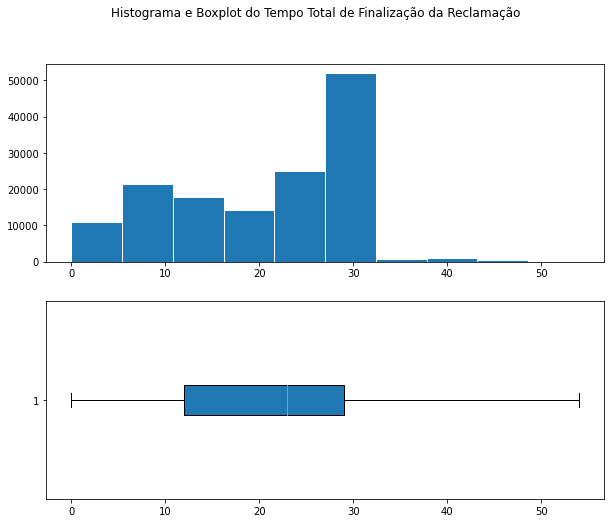

In [242]:
# Variável Tempo Total

fig, ax = plt.subplots(2, 1, figsize = (10, 8))

ax[0].hist(reclamacao['Tempo Total'], edgecolor="white")
ax[1].boxplot(reclamacao['Tempo Total'], vert = False, patch_artist = True)

fig.suptitle('Histograma e Boxplot do Tempo Total de Finalização da Reclamação')


plt.show()

In [216]:
# Vemos que a distribuição parece ter um deslocamento para a esquerda, ou seja, uma tendência para uma assimetria negativa
# Podemos validar isso calculando o skewness
stats.skew(reclamacao['Tempo Total'])

-0.37956564532708076

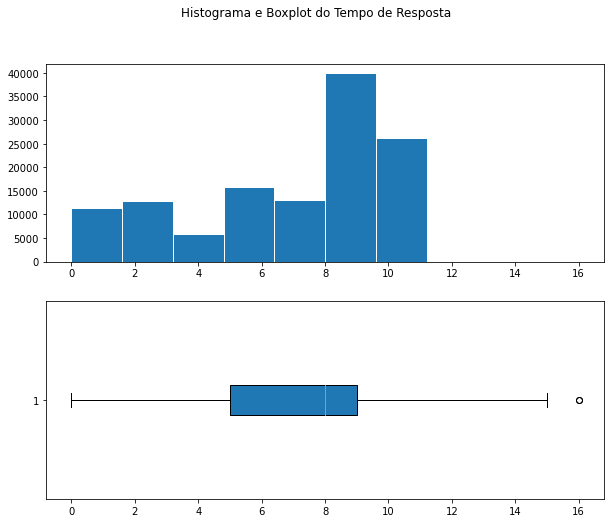

In [243]:
# Variável Tempo de Resposta

fig, ax = plt.subplots(2, 1, figsize = (10, 8))

tempo_resposta = reclamacao['Tempo Resposta'].dropna()

ax[0].hist(tempo_resposta, edgecolor="white")
ax[1].boxplot(tempo_resposta, vert = False, patch_artist = True)

fig.suptitle('Histograma e Boxplot do Tempo de Resposta')

plt.show()

In [227]:
# Vemos que essa distribuição também parece ter um deslocamento para a esquerda, ou seja, uma tendência para uma assimetria 
# negativa.
# Podemos validar isso calculando o skewness
stats.skew(tempo_resposta)

-0.7349225177573822

In [235]:
# Detectamos a presença de outliers na variável Tempo Resposta
# Identificando qual é o valor outlier
q1 = np.quantile(tempo_resposta, 0.25)
 
q3 = np.quantile(tempo_resposta, 0.75)
med = np.median(tempo_resposta)
 
iqr = q3-q1
 
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(f"IQR: {iqr}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

outliers = tempo_resposta[(tempo_resposta <= lower_bound) | (tempo_resposta >= upper_bound)]
print(f'\nOs Outliers detectados no Boxplot foram:\n{outliers}')

IQR: 4.0
Upper Bound: 15.0
Lower Bound: -1.0

Os Outliers detectados no Boxplot foram:
25021    16.0
27108    16.0
31643    15.0
Name: Tempo Resposta, dtype: float64


#### Analisando as variáveis categóricas
Todas as demais variáveis interessantes de serem analisadas são categóricas, por isso daremos continuidade à análise exploratória para as mesmas.

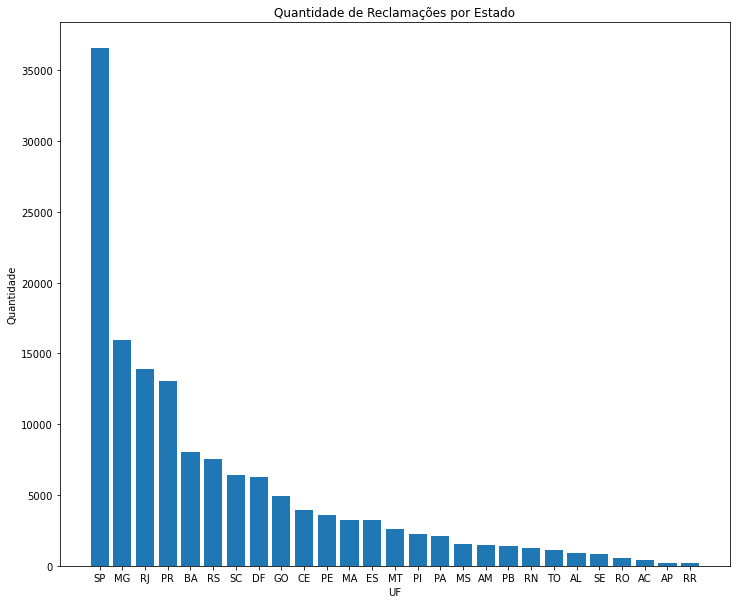

In [177]:
# Variável UF

fig, ax = plt.subplots(figsize = (12, 10))

names = reclamacao['UF'].value_counts().index
values = reclamacao['UF'].value_counts()

ax.bar(names, values)

ax.set_xlabel('UF')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Reclamações por Estado')

plt.show()

Vemos aqui que a quantidade de reclamações é bem maior no estado de São Paulo, e isso faz sentido visto que é o estado mais populoso, logo tem uma maior tendência de ter mais reclamações. Depois de São Paulo, os estados de Minas Gerais, Rio de Janeiro e Paraná possuem uma quantidade bem parecida de de reclamações.

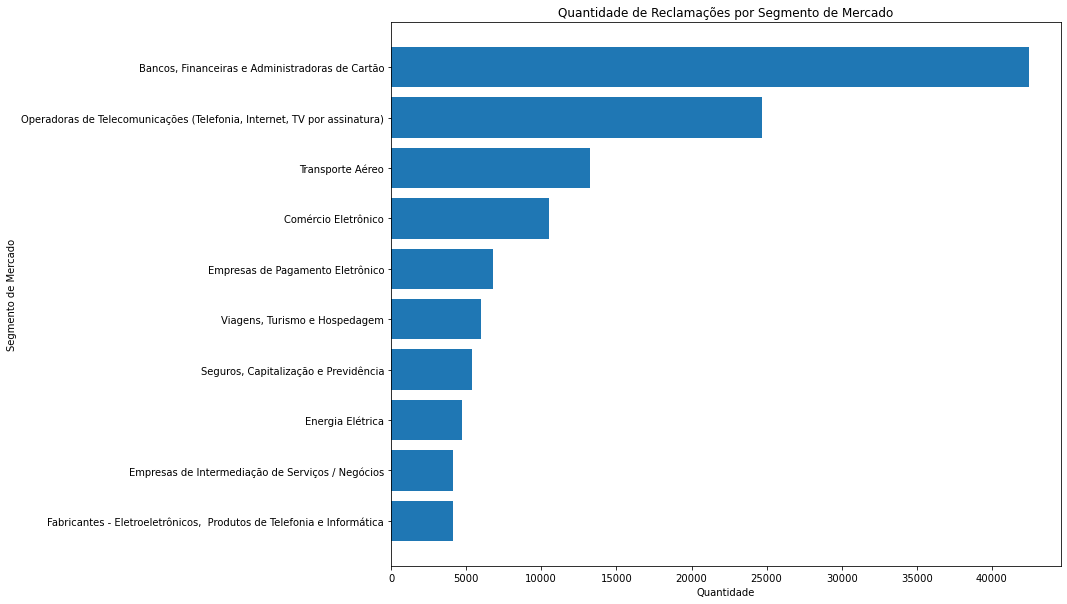

In [178]:
# Variável Segmento de Mercado

fig, ax = plt.subplots(figsize = (12, 10))

names = reclamacao['Segmento de Mercado'].value_counts(ascending = True).tail(10).index
values = reclamacao['Segmento de Mercado'].value_counts(ascending = True).tail(10)

ax.barh(names, values)

ax.set_xlabel('Quantidade')
ax.set_ylabel('Segmento de Mercado')
ax.set_title('Quantidade de Reclamações por Segmento de Mercado')

plt.show()

Observamos que as empresas que lideram o ranking de reclamações são os Bancos, Financeiras e Administradoras de Cartão, seguidos de Operadoras de Telecomunicação. Novamente faz sentido que essas empresas sejam os maiores alvos de reclamações, já que são serviços que as pessoas utilizam o tempo inteiro (como usar fazer pagamentos, usar telefone celular, etc).

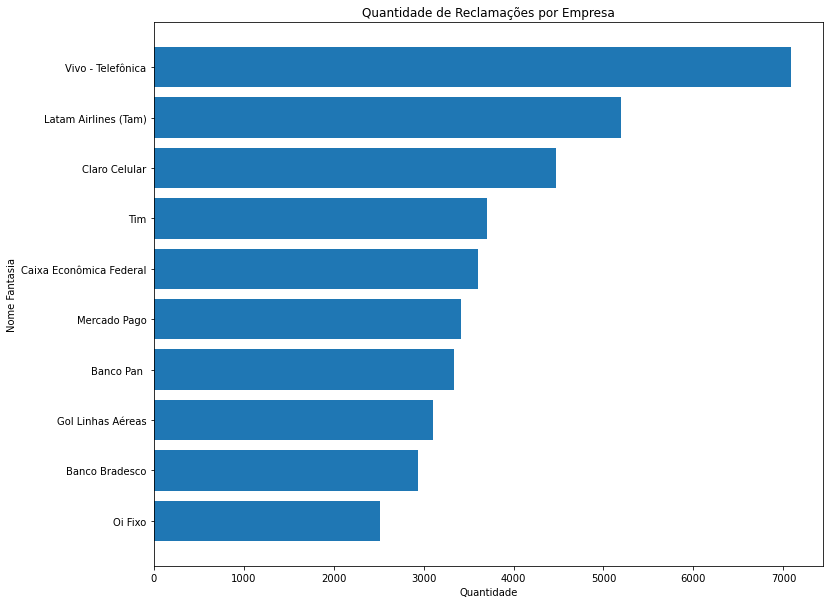

In [179]:
# Variável Nome Fantasia

fig, ax = plt.subplots(figsize = (12, 10))

names = reclamacao['Nome Fantasia'].value_counts(ascending = True).tail(10).index
values = reclamacao['Nome Fantasia'].value_counts(ascending = True).tail(10)

ax.barh(names, values)

ax.set_xlabel('Quantidade')
ax.set_ylabel('Nome Fantasia')
ax.set_title('Quantidade de Reclamações por Empresa')

plt.show()

Com esse gráfico podemos confirmar que as empresas que mais sofreram reclamações no mês de março de 2022 estão nos 3 primeiros segmentos mencionados no gráfico anterior, sendo a Vivo - Telefônica campeã de reclamações.

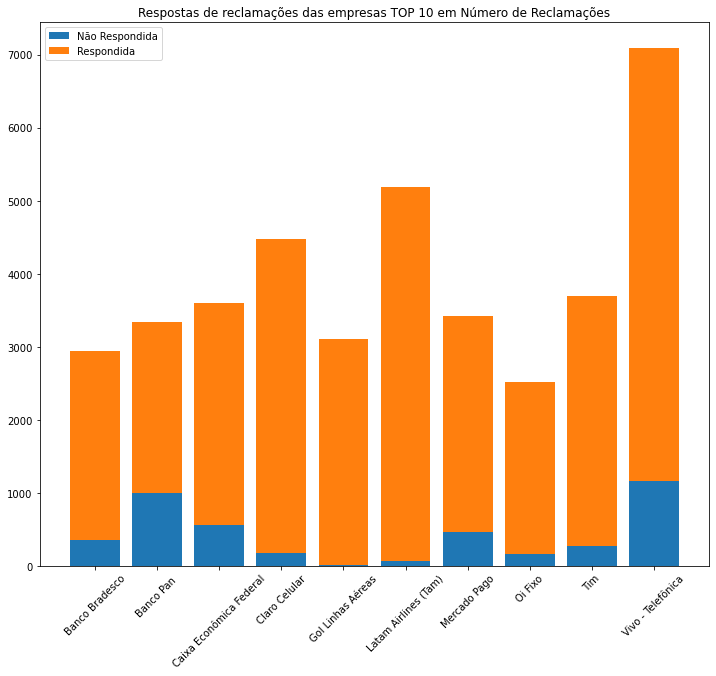

In [180]:
# Plot das empresas TOP 10 em número de reclamações e a quantidade de respostas realizadas
names = reclamacao['Nome Fantasia'].value_counts(ascending = True).tail(10).index

reclamacao_respondida = pd.DataFrame(reclamacao[['Nome Fantasia', 'Respondida']].value_counts(ascending = True).unstack()).reset_index()
reclamacao_top10 = reclamacao_respondida[reclamacao_respondida['Nome Fantasia'].isin(list(names))]

labels = reclamacao_top10['Nome Fantasia']
N_0 = reclamacao_top10[0]
S_1 = reclamacao_top10[1]

fig, ax = plt.subplots(figsize = (12, 10))

ax.bar(labels, N_0, label='Não Respondida')
ax.bar(labels, S_1, label='Respondida', bottom = N_0)

ax.set_title('Respostas de reclamações das empresas TOP 10 em Número de Reclamações')
ax.legend()

plt.xticks(rotation=45)
plt.show()

Pode ser observado aqui que todas as empresas possuem mais reclamações respondidas do que não respondidas. No caso, é possível observar que entre essas empresas, o Banco Pan parece possuir a pior proporção de respostas não respondidas em relação às respondidas.

Além disso, podemos avaliar também quais são as reclamações mais comuns, fazendo um recorte por empresa, por segmento de mercado ou por estado, por exemplo. Pode ser avaliado o setor de bancos e financeiras, que é o segmento com maior número de reclamações.

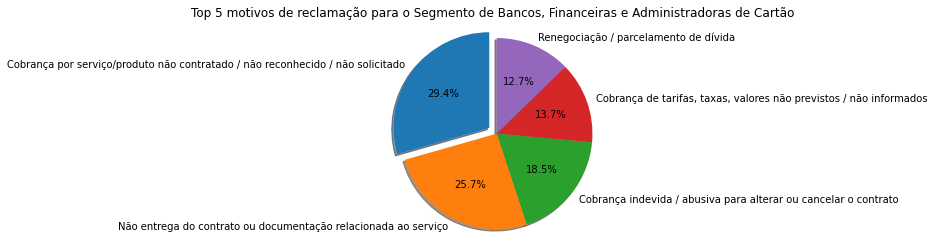

In [181]:
# Top 5 reclamações no Segmento de Mercado - Bancos, financeiras e administradoras de cartão
grupo_segmento = pd.DataFrame(reclamacao[['Segmento de Mercado', 'Problema']].value_counts(ascending = True).unstack()).reset_index()
grupo_segmento_top5 = grupo_segmento[grupo_segmento['Segmento de Mercado'] == 'Bancos, Financeiras e Administradoras de Cartão']
grupo_segmento_top5 = grupo_segmento_top5.transpose().reset_index().drop(0).sort_values(by = 4, ascending = False).head(5)


labels = grupo_segmento_top5['Problema']
sizes = grupo_segmento_top5[4]
explode = (0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Top 5 motivos de reclamação para o Segmento de Bancos, Financeiras e Administradoras de Cartão')
plt.show()

Ou seja, aqui pode ser visto que o maior motivo de reclamações para o Segmento de Bancos, Financeiras e Administradoras de Cartão é cobrança indevida de serviços ou produtos que não foram contratados, solicitados ou reconhecidos.

Finalizando aqui a análise exploratória, podemos extrair alguns insights:
1. Extraímos que a maior quantidade de reclamações é feita por causa de cobranças por serviços ou produtos não reconhecidos/solicitados/contratados pelo consumidor. 
2. O Segmento de Mercado com mais reclamações são os Bancos, Financeiras e Administradoras de Cartão.
3. A empresa campeã em número de reclamações no mês de março de 2022 foi a Vivo.
4. O estado com maior número de reclamações nesse período foi São Paulo.

Esses insights podem revelar informações importantes para as empresas participantes do Portal Consumidor.gov.br, uma vez que os dados nos mostram em qual área da empresa devem ser tomadas medidas para evitar essas reclamações. A análise exploratória também pode ser feita para cada empresa individualmente, o que facilitaria ainda mais o suporte à tomada de alguma decisão relativa à área da empresa que é alvo de mais reclamações.

Por exemplo: Dentro do setor de Bancos e Financeiras, já sabemos qual é o maior motivo de reclamações. Portanto, um banco específico pode tomar medidas, como uma auditoria por exemplo, para avaliar o porquê de o setor de cobrança estar fazendo cobranças indevidas em seus clientes, e se for esse o caso, avaliar como o problema pode ser resolvido.

#### Enriquecendo o dataset do Portal Consumidor.gov.br

In [182]:
# Leitura dos dados com os Scores do Reclame Aqui
scores = pd.read_excel("dados\scores21-04.xlsx", index_col=0)

In [183]:
# Visualizando as primeiras 5 linhas
scores.head()

,Nome Empresa,Score Reclame Aqui,Nome no Reclame Aqui
0,Chevrolet,7.2,Chevrolet
1,Decolar-com,4.9,Decolar
2,Facebook / Instagram,0,Instagram
3,Claro-TV,0,Claro TV
4,Ponto Frio Loja Online,6.7,Ponto (Ponto Frio) – Loja Online


In [184]:
# Desfazendo a limpeza dos dados efetuada na Parte 1
nome_fantasia = []

for item in scores['Nome Empresa']:
    item = item.replace("-com", ".com")
    item = item.replace('-TV', ' TV')
    item = item.replace('Ponto Frio Loja Online','Pontofrio-com')
    
    
    nome_fantasia.append(item)

In [185]:
# Adicionando a coluna com os nomes originais e removendo as outras
scores['Nome Fantasia'] = nome_fantasia
scores.drop(['Nome Empresa', 'Nome no Reclame Aqui'], axis = 1, inplace = True)

In [186]:
# Visualizando as primeiras 5 linhas
scores.head()

,Score Reclame Aqui,Nome Fantasia
0,7.2,Chevrolet
1,4.9,Decolar.com
2,0,Facebook / Instagram
3,0,Claro TV
4,6.7,Pontofrio-com


In [187]:
# Unindo os datasets
reclamacao = reclamacao.merge(scores, on='Nome Fantasia', how='left')

In [188]:
# Visualizando o dataframe
reclamacao

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Tempo Total,Score Reclame Aqui
0,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Morro Reuter,M,entre 41 a 50 anos,2022,1,2022-01-13,...,Produto danificado / não funciona - Dificuldad...,Loja física,1,0,Finalizada não avaliada,Não Avaliada,NaN,0,47,7.2
1,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,M,entre 41 a 50 anos,2022,1,2022-01-13,...,Dificuldade / atraso na devolução de valores p...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,47,4.9
2,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Porto Alegre,F,entre 31 a 40 anos,2022,1,2022-01-13,...,Dificuldade / atraso na devolução de valores p...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,47,4.9
3,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Santos,F,entre 31 a 40 anos,2022,1,2022-01-14,...,Vazamento de dados ou outros incidentes de seg...,Internet,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,46,0
4,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Peruíbe,F,entre 21 a 30 anos,2022,1,2022-01-14,...,Dificuldade para alterar/ ativar serviços,Não comprei / contratei,1,1,Finalizada não avaliada,Não Avaliada,NaN,0,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143567,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Jundiaí,F,entre 31 a 40 anos,2022,3,2022-03-31,...,Dificuldade de cancelamento / eliminação de da...,Internet,1,1,Finalizada avaliada,Resolvida,3.0,NaN,0,8
143568,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,M,entre 41 a 50 anos,2022,3,2022-03-31,...,Má qualidade no atendimento (descortesia / des...,Loja física,0,1,Finalizada avaliada,Não Resolvida,1.0,NaN,0,0
143569,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Contagem,F,entre 31 a 40 anos,2022,3,2022-03-31,...,Renegociação / parcelamento de dívida,Telefone,1,1,Finalizada avaliada,Não Resolvida,1.0,NaN,0,7
143570,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Sertãozinho,M,entre 21 a 30 anos,2022,3,2022-03-31,...,Renegociação / parcelamento de dívida,Loja física,1,1,Finalizada avaliada,Não Resolvida,5.0,NaN,0,6.7


In [189]:
# Shape final: 143572 observações e 32 variáveis

#### Feature Selection e Construção do Modelo

In [190]:
# Para Feature Selection será usada a Correlação V de Crámer, uma variação do teste do Qui-Quadrado de Pearson.
# A função para o cálculo da correlação pode ser encontrado em: 
# http://shakedzy.xyz/dython/getting_started/examples/

# A função utilizada aqui espera receber variáveis numéricas e categóricas, para isso as variáveis antes transformadas
# em Datetime serão convertidas novamente em string
reclamacao[['Data Abertura','Data Resposta','Data Análise','Data Recusa','Data Finalização', 'Prazo Resposta']] = reclamacao[['Data Abertura','Data Resposta','Data Análise','Data Recusa','Data Finalização', 'Prazo Resposta']].astype(str)

In [191]:
reclamacao.dtypes

Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Data Resposta              object
Data Análise               object
Data Recusa                object
Data Finalização           object
Prazo Resposta             object
Prazo Analise Gestor      float64
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empresa           object
Respondida                 object
Situação                   object
Avaliação Reclamação       object
Nota do Consumidor        float64
Análise da Rec

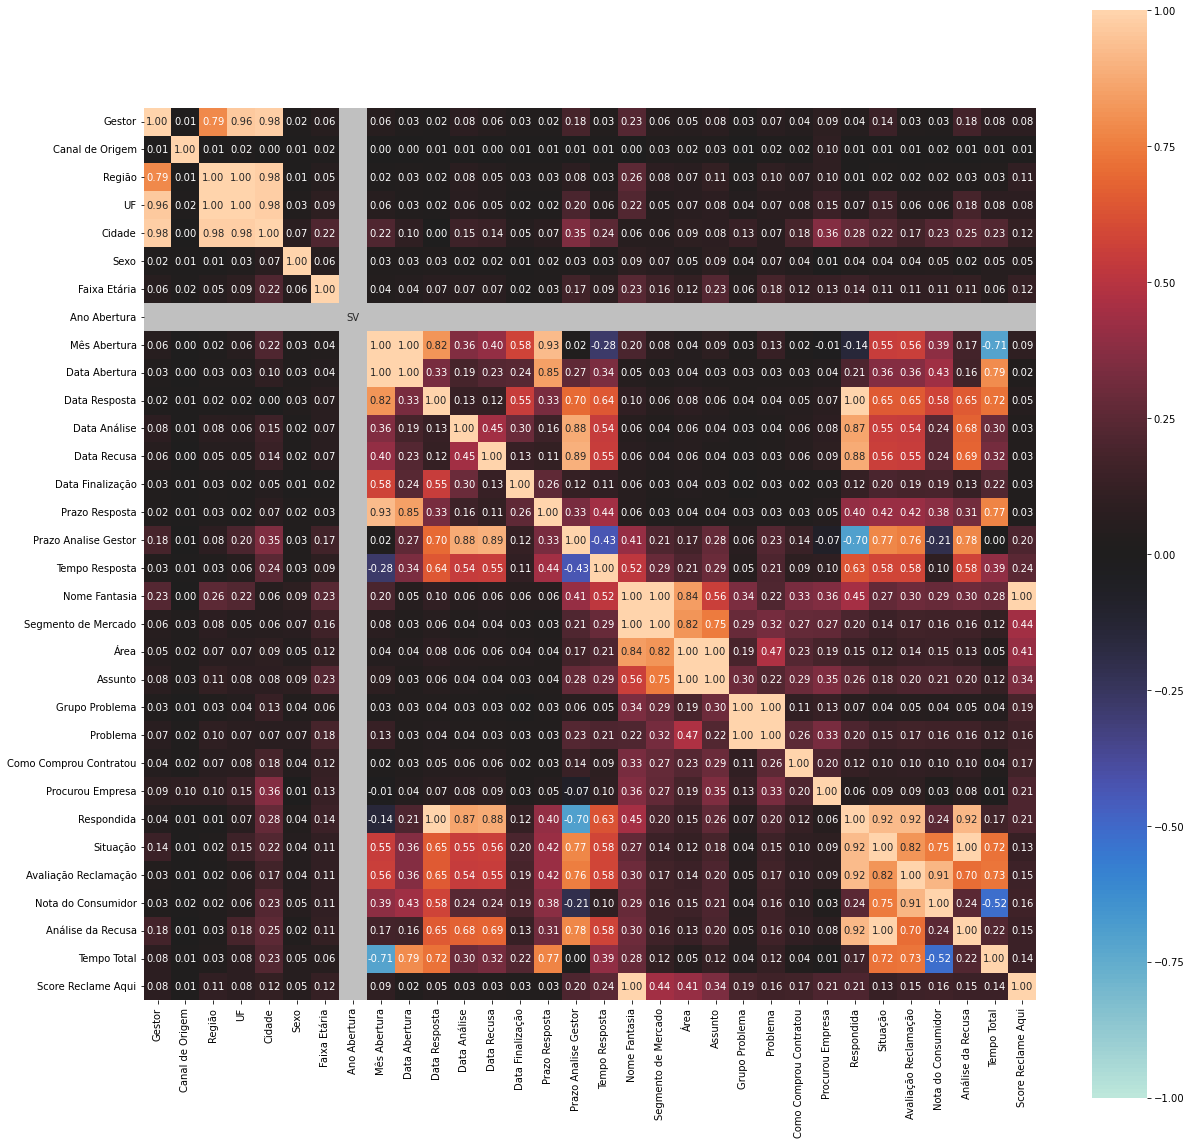

In [192]:
# Plot das associações
tabela_corr = associations(reclamacao, nom_nom_assoc='cramer', numerical_columns = 'auto', figsize=(20, 20))

In [193]:
# Visualizando a tabela
tabela_corr['corr']['Nota do Consumidor'].sort_values(ascending = False)

Nota do Consumidor        1.000000
Avaliação Reclamação      0.912186
Situação                  0.749287
Data Resposta             0.576029
Data Abertura             0.431539
Mês Abertura              0.385562
Prazo Resposta            0.378381
Nome Fantasia             0.285198
Análise da Recusa         0.243123
Respondida                0.242769
Data Recusa               0.240020
Data Análise              0.235153
Cidade                    0.227240
Assunto                   0.208669
Data Finalização          0.191950
Segmento de Mercado       0.162920
Problema                  0.157824
Score Reclame Aqui        0.157275
Área                      0.149821
Faixa Etária              0.106669
Tempo Resposta            0.100146
Como Comprou Contratou    0.095814
UF                        0.057266
Sexo                      0.049225
Grupo Problema            0.039512
Gestor                    0.028879
Procurou Empresa          0.027319
Região                    0.024868
Canal de Origem     

In [291]:
# Criando um novo dataset com as variáveis
reclamacao_v1 = reclamacao[['Avaliação Reclamação', 'Situação', 'Mês Abertura', 'Prazo Resposta', 
                            'Nome Fantasia', 'Análise da Recusa', 'Respondida', 'Cidade', 'Assunto', 
                            'Segmento de Mercado', 'Problema','Score Reclame Aqui', 'Área', 
                            'Prazo Analise Gestor', 'Faixa Etária', 'Tempo Resposta',
                            'Tempo Total', 'Nota do Consumidor']]
reclamacao_v1

,Avaliação Reclamação,Situação,Mês Abertura,Prazo Resposta,Nome Fantasia,Análise da Recusa,Respondida,Cidade,Assunto,Segmento de Mercado,Problema,Score Reclame Aqui,Área,Prazo Analise Gestor,Faixa Etária,Tempo Resposta,Tempo Total,Nota do Consumidor
0,Não Avaliada,Finalizada não avaliada,1,2022-02-07,Chevrolet,0,0,Morro Reuter,"Veículos Novos (motos, carros, caminhões)","Montadoras, Concessionárias e Prestadores de S...",Produto danificado / não funciona - Dificuldad...,7.2,Demais Produtos,15.0,entre 41 a 50 anos,NaN,47,NaN
1,Não Avaliada,Finalizada não avaliada,1,2022-02-07,Decolar.com,0,1,Porto Alegre,Aéreo,"Viagens, Turismo e Hospedagem",Dificuldade / atraso na devolução de valores p...,4.9,Transportes,15.0,entre 41 a 50 anos,11.0,47,NaN
2,Não Avaliada,Finalizada não avaliada,1,2022-02-07,Decolar.com,0,1,Porto Alegre,Aéreo,"Viagens, Turismo e Hospedagem",Dificuldade / atraso na devolução de valores p...,4.9,Transportes,15.0,entre 31 a 40 anos,11.0,47,NaN
3,Não Avaliada,Finalizada não avaliada,1,2022-02-08,Facebook / Instagram,0,1,Santos,"Serviços na internet (provedor, hospedagem, ap...",Provedores de Conteúdo e Outros Serviços na In...,Vazamento de dados ou outros incidentes de seg...,0,Demais Serviços,15.0,entre 31 a 40 anos,10.0,46,NaN
4,Não Avaliada,Finalizada não avaliada,1,2022-02-08,Claro TV,0,1,Peruíbe,TV por Assinatura,"Operadoras de Telecomunicações (Telefonia, Int...",Dificuldade para alterar/ ativar serviços,0,Telecomunicações,15.0,entre 21 a 30 anos,10.0,46,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143567,Resolvida,Finalizada avaliada,3,2022-04-10,123 Milhas,NaN,1,Jundiaí,Pacote / excursão / agência de turismo,"Viagens, Turismo e Hospedagem",Dificuldade de cancelamento / eliminação de da...,8,Turismo/Viagens,NaN,entre 31 a 40 anos,0.0,0,3.0
143568,Não Resolvida,Finalizada avaliada,3,2022-04-10,Ezze Seguros,NaN,1,São Paulo,Serviço de Assessoria (jurídica e/ou financeir...,"Seguros, Capitalização e Previdência",Má qualidade no atendimento (descortesia / des...,0,Demais Serviços,NaN,entre 41 a 50 anos,0.0,0,1.0
143569,Não Resolvida,Finalizada avaliada,3,2022-04-10,Faculdade Unopar,NaN,1,Contagem,Superior ( Graduação e Pós ),Estabelecimentos de Ensino,Renegociação / parcelamento de dívida,7,Educação,NaN,entre 31 a 40 anos,0.0,0,1.0
143570,Não Resolvida,Finalizada avaliada,3,2022-04-10,Faculdade Anhanguera,NaN,1,Sertãozinho,Superior ( Graduação e Pós ),Estabelecimentos de Ensino,Renegociação / parcelamento de dívida,6.7,Educação,NaN,entre 21 a 30 anos,0.0,0,5.0


In [292]:
# Avaliando valores missing
reclamacao_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143572 entries, 0 to 143571
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Avaliação Reclamação  127635 non-null  object 
 1   Situação              143572 non-null  object 
 2   Mês Abertura          143572 non-null  int64  
 3   Prazo Resposta        143572 non-null  object 
 4   Nome Fantasia         143572 non-null  object 
 5   Análise da Recusa     19064 non-null   object 
 6   Respondida            143572 non-null  object 
 7   Cidade                143572 non-null  object 
 8   Assunto               143572 non-null  object 
 9   Segmento de Mercado   143572 non-null  object 
 10  Problema              143572 non-null  object 
 11  Score Reclame Aqui    143159 non-null  object 
 12  Área                  143572 non-null  object 
 13  Prazo Analise Gestor  18496 non-null   float64
 14  Faixa Etária          143572 non-null  object 
 15  

Percebe-se que a maioria dos valores nas variáveis Análise da Recusa e Prazo Analise Gestor. Essas colunas serão excluídas.

No caso da variável target, que também possui muitos valores missing, essas observações serão apenas excluídas, uma vez que não queremos causar enviesamento na construção do modelo.

In [293]:
# Excluindo as colunas que possuem muitos valores NA
reclamacao_v1.drop(columns = ['Análise da Recusa', 'Prazo Analise Gestor'], inplace = True)

C:\Users\vieir\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [294]:
# Excluindo os valores NA
reclamacao_v1.dropna(inplace = True)
reclamacao_v1

C:\Users\vieir\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Avaliação Reclamação,Situação,Mês Abertura,Prazo Resposta,Nome Fantasia,Respondida,Cidade,Assunto,Segmento de Mercado,Problema,Score Reclame Aqui,Área,Faixa Etária,Tempo Resposta,Tempo Total,Nota do Consumidor
45,Não Resolvida,Finalizada avaliada,1,2022-02-11,Facebook / Instagram,1,Guariba,"Serviços na internet (provedor, hospedagem, ap...",Provedores de Conteúdo e Outros Serviços na In...,Suspensão ou desligamento indevido do serviço,0,Demais Serviços,até 20 anos,10.0,45,1.0
61,Não Resolvida,Finalizada avaliada,1,2022-02-12,Claro Celular,1,Caxias do Sul,Aparelho celular,"Operadoras de Telecomunicações (Telefonia, Int...",Oferta não cumprida / serviço não fornecido/ v...,0,Produtos de Telefonia e Informática,entre 51 a 60 anos,10.0,43,1.0
62,Não Resolvida,Finalizada avaliada,1,2022-02-12,Facebook / Instagram,1,Campinas,"Serviços na internet (provedor, hospedagem, ap...",Provedores de Conteúdo e Outros Serviços na In...,Dificuldade de reclamar ou de obter tratamento...,0,Demais Serviços,entre 41 a 50 anos,9.0,43,1.0
64,Não Resolvida,Finalizada avaliada,1,2022-02-10,Banco Itaú Unibanco,1,São Paulo,Conta corrente / Salário / Poupança /Conta Apo...,"Bancos, Financeiras e Administradoras de Cartão",Renegociação / parcelamento de dívida,0,Serviços Financeiros,entre 21 a 30 anos,10.0,43,3.0
82,Não Resolvida,Finalizada avaliada,1,2022-02-12,Vivo - Telefônica,1,Praia Grande,Internet Fixa,"Operadoras de Telecomunicações (Telefonia, Int...",Cobrança indevida / abusiva para alterar ou ca...,0,Telecomunicações,entre 31 a 40 anos,9.0,43,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143567,Resolvida,Finalizada avaliada,3,2022-04-10,123 Milhas,1,Jundiaí,Pacote / excursão / agência de turismo,"Viagens, Turismo e Hospedagem",Dificuldade de cancelamento / eliminação de da...,8,Turismo/Viagens,entre 31 a 40 anos,0.0,0,3.0
143568,Não Resolvida,Finalizada avaliada,3,2022-04-10,Ezze Seguros,1,São Paulo,Serviço de Assessoria (jurídica e/ou financeir...,"Seguros, Capitalização e Previdência",Má qualidade no atendimento (descortesia / des...,0,Demais Serviços,entre 41 a 50 anos,0.0,0,1.0
143569,Não Resolvida,Finalizada avaliada,3,2022-04-10,Faculdade Unopar,1,Contagem,Superior ( Graduação e Pós ),Estabelecimentos de Ensino,Renegociação / parcelamento de dívida,7,Educação,entre 31 a 40 anos,0.0,0,1.0
143570,Não Resolvida,Finalizada avaliada,3,2022-04-10,Faculdade Anhanguera,1,Sertãozinho,Superior ( Graduação e Pós ),Estabelecimentos de Ensino,Renegociação / parcelamento de dívida,6.7,Educação,entre 21 a 30 anos,0.0,0,5.0


In [295]:
# Shape: 64624 observações e 19 colunas

#### Construção do modelo de Machine Learning

In [296]:
# Avaliando a proporção das classes da variável target
tab = pd.crosstab(index=reclamacao_v1['Nota do Consumidor'], columns='count')

tab/tab.sum()

col_0,count
Nota do Consumidor,
1.0,0.456317
2.0,0.049548
3.0,0.090322
4.0,0.095212
5.0,0.308601


Vemos aqui que existem muito mais notas 1 e 5, deixando a proporção das classes bastante desbalanceada. Vamos manter as classes desbalanceadas e voltar posteriormente para a construção de uma nova versão do modelo. Para auxiliar na questão de processamento, já que a quantidade de dados é bastante alta, será feito aqui um amostragem aleatória para construir um dataset menor.

In [297]:
# Fazendo a amostragem aleatória simples
reclamacao_v1_sample = reclamacao_v1.sample(10000, random_state = 100)

In [298]:
# Avaliando a proporção das classes
tab = pd.crosstab(index=reclamacao_v1_sample['Nota do Consumidor'], columns='count')

tab/tab.sum()

col_0,count
Nota do Consumidor,
1.0,0.4539
2.0,0.0512
3.0,0.0893
4.0,0.0983
5.0,0.3073


A amostragem aleatória está bastante condizente com a proporção real dos dados, portanto seguiremos para as próximas etapas.

In [299]:
# Resentando o índice e imprimindo o dataset
reclamacao_v1_sample.reset_index(inplace = True, drop = True)
reclamacao_v1_sample.head()

,Avaliação Reclamação,Situação,Mês Abertura,Prazo Resposta,Nome Fantasia,Respondida,Cidade,Assunto,Segmento de Mercado,Problema,Score Reclame Aqui,Área,Faixa Etária,Tempo Resposta,Tempo Total,Nota do Consumidor
0,Resolvida,Finalizada avaliada,3,2022-03-26,Banco Pan,1,Lages,Crédito Pessoal e Demais Empréstimos (exceto f...,"Bancos, Financeiras e Administradoras de Cartão",Dificuldade / atraso na devolução de valores p...,7.1,Serviços Financeiros,entre 41 a 50 anos,8.0,8,3.0
1,Não Resolvida,Finalizada avaliada,2,2022-03-18,Recovery do Brasil Consultoria,1,Chapadinha,Crédito Pessoal e Demais Empréstimos (exceto f...,Empresas de Recuperação de Crédito,Cobrança indevida / abusiva para alterar ou ca...,Não Encontrado,Serviços Financeiros,entre 21 a 30 anos,3.0,38,5.0
2,Não Resolvida,Finalizada avaliada,2,2022-02-22,Smiles,1,Rio de Janeiro,"Programas de Fidelidade / Benefícios (pontos, ...",Programas de Fidelidade,Oferta não cumprida / serviço não fornecido/ v...,6.9,Demais Serviços,entre 31 a 40 anos,10.0,29,1.0
3,Resolvida,Finalizada avaliada,2,2022-03-05,Shopee Brasil,1,Itanhaém,"Livros e papelaria (material didático, artigos...",Comércio Eletrônico,Dificuldade / atraso na devolução de valores p...,0,Demais Produtos,entre 21 a 30 anos,9.0,11,3.0
4,Não Resolvida,Finalizada avaliada,3,2022-03-18,Banco BV (antigo Banco Votorantim),1,Bombinhas,Cartão de Crédito / Cartão de Débito / Cartão ...,"Bancos, Financeiras e Administradoras de Cartão",Oferta não cumprida / serviço não fornecido/ v...,7.1,Serviços Financeiros,entre 51 a 60 anos,10.0,16,1.0


In [300]:
# Aplicando o One-Hot Encoding
features = pd.get_dummies(reclamacao_v1_sample)

In [302]:
features

,Mês Abertura,Tempo Resposta,Tempo Total,Nota do Consumidor,Avaliação Reclamação_Não Resolvida,Avaliação Reclamação_Resolvida,Situação_Finalizada avaliada,Situação_Finalizada não avaliada,Prazo Resposta_2022-02-09,Prazo Resposta_2022-02-10,...,Área_Transportes,Área_Turismo/Viagens,"Área_Água, Energia, Gás",Faixa Etária_até 20 anos,Faixa Etária_entre 21 a 30 anos,Faixa Etária_entre 31 a 40 anos,Faixa Etária_entre 41 a 50 anos,Faixa Etária_entre 51 a 60 anos,Faixa Etária_entre 61 a 70 anos,Faixa Etária_mais de 70 anos
0,3,8.0,8,3.0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,3.0,38,5.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,10.0,29,1.0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,9.0,11,3.0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,10.0,16,1.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,6.0,24,1.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9996,2,8.0,18,1.0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9997,3,1.0,1,4.0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9998,3,10.0,20,1.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [303]:
# Separando a label (variável target)
labels = np.array(features['Nota do Consumidor'])

# Removendo a variável target do dataset
features = features.drop('Nota do Consumidor', axis = 1)

# Separando o nome das colunas
feature_list = list(features.columns)

# Convertendo as variáveis para array
features = np.array(features)

In [304]:
# Separando os dados de treino e teste
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30)

In [305]:
# Avaliando o shape dos dados
print('Features de Treino - Shape:', train_features.shape)
print('Labels de Treino - Shape:', train_labels.shape)
print('Features de Teste - Shape:', test_features.shape)
print('Labels de Teste - Shape:', test_labels.shape)

Features de Treino - Shape: (7000, 2302)
Labels de Treino - Shape: (7000,)
Features de Teste - Shape: (3000, 2302)
Labels de Teste - Shape: (3000,)


#### Modelo de Árvore de Decisão

In [306]:
# Teste com o Árvore de Decisão
X, y = train_features, train_labels
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [307]:
# Fazendo as previsões
previsoes = clf.predict(test_features)

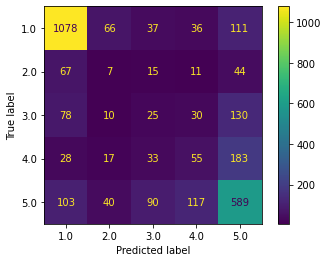

In [308]:
# Plotando a matriz de confusão
cm = confusion_matrix(test_labels, previsoes, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [309]:
from sklearn.metrics import classification_report

# relatório do modelo
print('Relatório de classificação:\n', classification_report(test_labels, previsoes))

Relatório de classificação:
               precision    recall  f1-score   support

         1.0       0.80      0.81      0.80      1328
         2.0       0.05      0.05      0.05       144
         3.0       0.12      0.09      0.11       273
         4.0       0.22      0.17      0.19       316
         5.0       0.56      0.63      0.59       939

    accuracy                           0.58      3000
   macro avg       0.35      0.35      0.35      3000
weighted avg       0.56      0.58      0.57      3000



Obtida uma acurácia de 58%.

#### Modelo kNN

In [330]:
# Teste com kNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [331]:
# Fazendo as previsões
previsoes = neigh.predict(test_features)

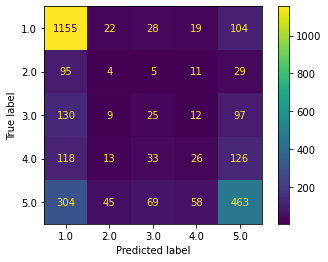

In [332]:
# Plotando a matriz de confusão
cm = confusion_matrix(test_labels, previsoes, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

In [333]:
# relatório do modelo
print('Relatório de classificação:\n', classification_report(test_labels, previsoes))

Relatório de classificação:
               precision    recall  f1-score   support

         1.0       0.64      0.87      0.74      1328
         2.0       0.04      0.03      0.03       144
         3.0       0.16      0.09      0.12       273
         4.0       0.21      0.08      0.12       316
         5.0       0.57      0.49      0.53       939

    accuracy                           0.56      3000
   macro avg       0.32      0.31      0.31      3000
weighted avg       0.50      0.56      0.52      3000



Obtida uma acurácia de 56%.

#### Modelo RandomForest

In [336]:
# Iniciando o modelo
rf = RandomForestClassifier(n_estimators = 100)

# Treinando o modelo
rf.fit(train_features, train_labels)

RandomForestClassifier()

In [337]:
# Fazendo as previsões
previsoes = rf.predict(test_features)

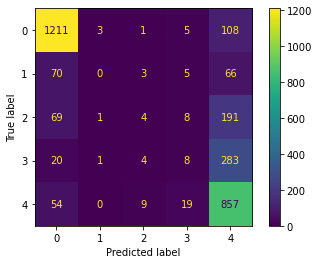

In [339]:
# Plotando a matriz de confusão
cm = confusion_matrix(test_labels, previsoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [340]:
# relatório do modelo
print('Relatório de classificação:\n', classification_report(test_labels, previsoes))

Relatório de classificação:
               precision    recall  f1-score   support

         1.0       0.85      0.91      0.88      1328
         2.0       0.00      0.00      0.00       144
         3.0       0.19      0.01      0.03       273
         4.0       0.18      0.03      0.04       316
         5.0       0.57      0.91      0.70       939

    accuracy                           0.69      3000
   macro avg       0.36      0.37      0.33      3000
weighted avg       0.59      0.69      0.62      3000



Obtida uma acurácia de 69%.

### Conclusões
A partir dos resultados apresentados acima, obtivemos a maior acurácia no modelo construído com Random Forest, com um valor de 69%. A acurácia dos modelos de Árvore de Decisão e kNN foram de 58% e 56%, respectivamente. O Random Forest é um modelo que utiliza de diversas árvores de decisão, e normalmente possui melhor eficácia em bases de dados mais complexas, como é o caso do presente trabalho.

Foi observado, neste trabalho, que as etapas de tratamento/processamento de dados são de extrema importância na construção de modelos de Machine Learning, uma vez que representaram a parte em que mais foi gasto tempo e pesquisa na elaboração e decisão do uso de uma técnica em detrimento de outra.

Como sugestão para trabalhos futuros, recomenda-se a utilização de outras técnicas diferentes no tratamento dos dados, e avaliar como essas técnicas podem impactar na acurácia dos modelos de Machine Learning propostos neste trabalho. Além disso, também seria interessante alterar os hiperparâmetros dos modelos e observar o impacto na acurácia de cada um deles.
